# About Dataset

## Data Description

**There are three types of input features**:
- **Objective:** Factual information
- **Examination:** Results of medical examination
- **Subjective:** Information given by the patient

---

### **Features**

| Feature Name         | Type         | Description                                               | Data Type         | Values/Range                        |
|----------------------|--------------|-----------------------------------------------------------|-------------------|-------------------------------------|
| `age`                | Objective    | Age (in days)                                             | int              |                                     |
| `height`             | Objective    | Height (in cm)                                            | int              |                                     |
| `weight`             | Objective    | Weight (in kg)                                            | float            |                                     |
| `gender`             | Objective    | Gender (categorical code)                                 | int/categorical  |     1: Male, 2: Female                                |
| `ap_hi`              | Examination  | Systolic blood pressure                                   | int              |                                     |
| `ap_lo`              | Examination  | Diastolic blood pressure                                  | int              |                                     |
| `cholesterol`        | Examination  | Cholesterol level                                         | int/categorical  | 1: normal, 2: above normal, 3: well above normal |
| `gluc`               | Examination  | Glucose level                                             | int/categorical  | 1: normal, 2: above normal, 3: well above normal |
| `smoke`              | Subjective   | Smoking status                                            | binary           | 0: No, 1: Yes                       |
| `alco`               | Subjective   | Alcohol intake                                            | binary           | 0: No, 1: Yes                       |
| `active`             | Subjective   | Physical activity                                         | binary           | 0: No, 1: Yes                       |
| `cardio`             | Target       | Cardiovascular disease presence/absence                   | binary           | 0: No, 1: Yes                       |

---

> **Note:**  
> All dataset values were collected at the moment of medical examination.

Project workflow:

---

### 1. **Import Libraries**
Loaded all necessary libraries for data handling, visualization, and machine learning.

---

### 2. **Load Data**
Read the dataset from a CSV file for analysis.

---

### 3. **Clean Data**
Split columns, removed unnecessary data, and converted data types for consistency.

---

### 4. **Explore Data**
Used statistics and plots to understand data distribution and spot outliers.

---

### 5. **Remove Outliers**
Filtered out unrealistic blood pressure values and duplicates to improve data quality.

---

### 6. **Feature Engineering**
Created new, more informative features (`chol`, `glucose`) based on existing categories.

---

### 7. **Preprocessing**
Selected relevant features and standardized them for modeling.

---

### 8. **Split Data**
Divided the data into training and testing sets.

---

### 9. **Baseline Model**
Built a simple logistic regression model to set a performance benchmark.

---

### 10. **Feature Selection**
Identified and selected the most important features for prediction.

---

### 11. **Model Building**
Trained a Random Forest model using the selected features.

---

### 12. **Final Evaluation**
Assessed the tuned model’s performance using classification metrics and confusion matrix.

---

### 13. **ROC Curve**
Plotted the ROC curve to evaluate the model’s ability to distinguish classes.





In [425]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from matplotlib import style
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif,RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, RocCurveDisplay
from sklearn.model_selection import GridSearchCV

import random
from xgboost import XGBClassifier


style.use('ggplot')
warnings.filterwarnings('ignore')

In [426]:
data = pd.read_csv('cardio_train.csv')
data.head()

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0


In [427]:
# Split the columns data into it's seperate columns
data[['id', 'age(days)', 'gender', 'height(cm)', 'weight(kg)', 'ap_hi', 
      'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']]= data['id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio'].str.split(';', expand=True)
data.head()

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio,id,age(days),gender,height(cm),weight(kg),ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [428]:
# drop the conjoined column
data.drop(columns='id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio', inplace=True)
data.head()

,id,age(days),gender,height(cm),weight(kg),ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [429]:
data.describe(include='O')

,id,age(days),gender,height(cm),weight(kg),ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000,70000
unique,70000,8076,2,109,287,153,157,3,3,2,2,2,2
top,0,19741,1,165,65.0,120,80,1,1,0,0,1,0
freq,1,32,45530,5853,3850,27699,34847,52385,59479,63831,66236,56261,35021


In [430]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           70000 non-null  object
 1   age(days)    70000 non-null  object
 2   gender       70000 non-null  object
 3   height(cm)   70000 non-null  object
 4   weight(kg)   70000 non-null  object
 5   ap_hi        70000 non-null  object
 6   ap_lo        70000 non-null  object
 7   cholesterol  70000 non-null  object
 8   gluc         70000 non-null  object
 9   smoke        70000 non-null  object
 10  alco         70000 non-null  object
 11  active       70000 non-null  object
 12  cardio       70000 non-null  object
dtypes: object(13)
memory usage: 6.9+ MB


In [431]:
int_columns = ['id', 'age(days)', 'gender', 'ap_lo', 'ap_hi', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
float_columns = ['height(cm)', 'weight(kg)']
for i in int_columns:
    data[i] = data[i].astype('int')

for f in float_columns:
    data[f] = data[f].astype('float')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age(days)    70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height(cm)   70000 non-null  float64
 4   weight(kg)   70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 6.9 MB


In [432]:
# Convert age(days) coluumn to years
data['age'] = (data['age(days)'] / 365).astype('int')
data.head()

,id,age(days),gender,height(cm),weight(kg),ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age
0,0,18393,2,168.0,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156.0,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165.0,64.0,130,70,3,1,0,0,0,1,51
3,3,17623,2,169.0,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156.0,56.0,100,60,1,1,0,0,0,0,47


In [433]:
data.describe()

,id,age(days),gender,height(cm),weight(kg),ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,52.840671
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.766774
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


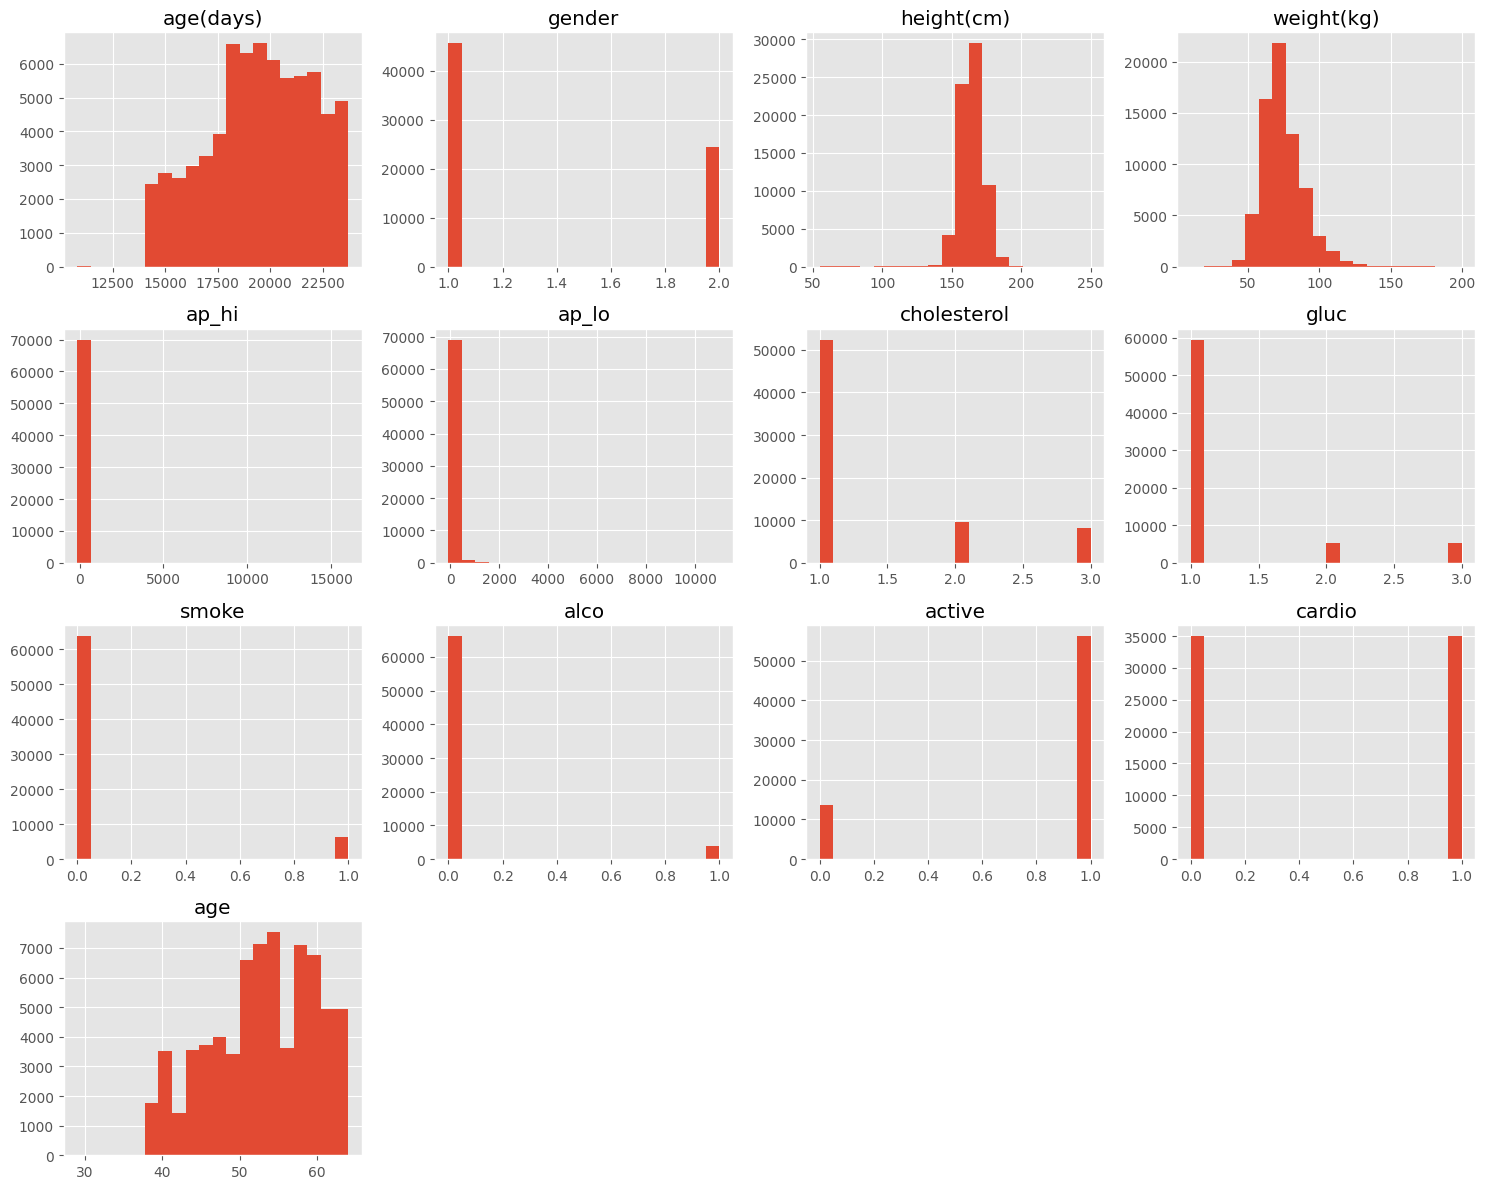

In [434]:
# Visualize the Distribution
data.drop('id', axis=1).hist(figsize=(15,12), bins=20);
plt.tight_layout()

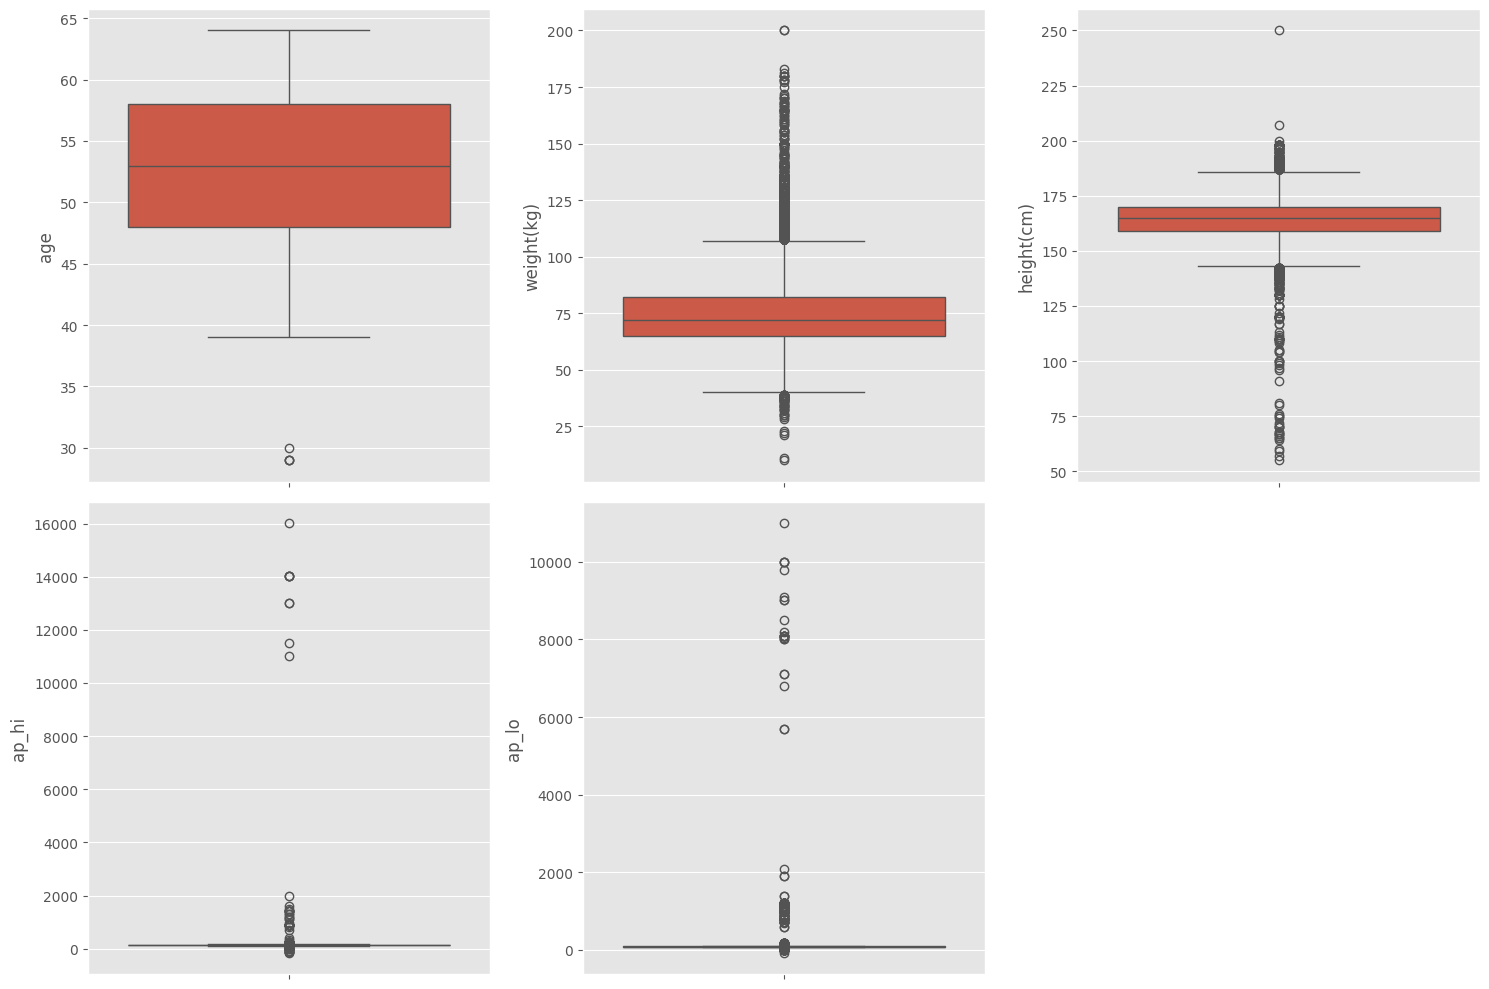

In [435]:
# Visualize Distribution with boxplot to detect outliers on continous data
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(data['age'])
# plt.xlabel('Age')

plt.subplot(2, 3, 2)
sns.boxplot(data['weight(kg)'])
# plt.xlabel('Weight')

plt.subplot(2, 3, 3)
sns.boxplot(data['height(cm)'])

plt.subplot(2, 3, 4)
sns.boxplot(data['ap_hi'])

plt.subplot(2, 3, 5)
sns.boxplot(data['ap_lo'])

plt.tight_layout()

### **Breakdown of blood pressure ranges:**

- **Normal:** Less than 120 systolic AND less than 80 diastolic. 

- **Elevated:** 120-129 systolic AND less than 80 diastolic. 

- **Stage 1 Hypertension:** 130-139 systolic OR 80-89 diastolic. 

- **Stage 2 Hypertension:** 140 or higher systolic OR 90 or higher diastolic. 

- **Hypertensive Crisis:** Higher than 180 systolic OR higher than 120 diastolic. This requires immediate medical attention.

Low diastolic blood pressure (below 60 mmHg) can also be a cause for concern and may require further investigation by a doctor. 

Both systolic and diastolic blood pressure can reach or exceed 240 mmHg, and this is considered a hypertensive crisis, a medical emergency. and either systolic or diastolic blood pressure can fall below 70 mm Hg under certain circumstances.


In summary relating to our dataset, I'll set the ap_hi(Systolic Blood Pressure) and ap_lo(Diastolic Blood Pressure) cutoff marks to range from 70-240 respectively incase if the patient is hypertensive(high BP) or hypotensive(low BP)

So anything higher or lower than our cutoff mark will be considered an outlier and will be filtered out

In [436]:
# Make a copy of the original data
cleaned_data = data.copy()

# Drop age(Days) column
cleaned_data.drop(columns=['age(days)', 'id'], inplace=True)

cleaned_data.duplicated().sum()

np.int64(3208)

In [437]:
cleaned_data.drop_duplicates(inplace=True)

In [438]:
# Filter data from ap_hi column that is not within our cutoff mark range
ap_hi_outliers = cleaned_data[(cleaned_data['ap_hi'] < 70 ) | (cleaned_data['ap_hi'] > 240)]
print(ap_hi_outliers.shape)
ap_hi_outliers.head()

(227, 12)


,gender,height(cm),weight(kg),ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age
567,1,168.0,78.0,14,90,2,1,0,0,1,1,58
927,2,175.0,70.0,14,90,3,1,0,0,1,1,59
979,1,172.0,65.0,11,80,1,3,0,0,1,0,49
1600,1,165.0,66.0,12,80,1,1,0,0,1,0,52
1627,1,165.0,71.0,14,80,1,1,0,0,1,1,61


In [439]:
# Filter data from ap_lo column that is not within our cutoff mark range
ap_lo_outliers = cleaned_data[(cleaned_data['ap_lo'] < 70 ) | (cleaned_data['ap_lo'] > 240)]
print(ap_lo_outliers.shape)
ap_lo_outliers.head()

(4092, 12)


,gender,height(cm),weight(kg),ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age
4,1,156.0,56.0,100,60,1,1,0,0,0,0,47
9,1,164.0,68.0,110,60,1,1,0,0,0,0,54
23,2,156.0,45.0,110,60,1,1,0,0,1,0,64
43,2,159.0,63.0,120,60,1,1,0,0,1,1,56
50,1,160.0,75.0,100,60,1,1,0,0,0,0,49


In [440]:
# Filter out the outliers from cleaned_data
cleaned_data = cleaned_data[(~cleaned_data.index.isin(ap_hi_outliers.index))
                            &(~cleaned_data.index.isin(ap_lo_outliers.index))]

print(cleaned_data.shape)
cleaned_data.head()

(62501, 12)


,gender,height(cm),weight(kg),ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age
0,2,168.0,62.0,110,80,1,1,0,0,1,0,50
1,1,156.0,85.0,140,90,3,1,0,0,1,1,55
2,1,165.0,64.0,130,70,3,1,0,0,0,1,51
3,2,169.0,82.0,150,100,1,1,0,0,1,1,48
5,1,151.0,67.0,120,80,2,2,0,0,0,0,60


In [441]:
cleaned_data.describe().round(2)

,gender,height(cm),weight(kg),ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age
count,62501.00,62501.00,62501.00,62501.00,62501.00,62501.00,62501.00,62501.00,62501.00,62501.0,62501.00,62501.00
mean,1.36,164.45,74.82,127.99,82.51,1.39,1.24,0.09,0.06,0.8,0.52,52.96
std,0.48,8.29,14.50,16.42,8.86,0.70,0.59,0.29,0.23,0.4,0.50,6.77
min,1.00,55.00,11.00,70.00,70.00,1.00,1.00,0.00,0.00,0.0,0.00,29.00
25%,1.00,159.00,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.00,48.00
50%,1.00,165.00,73.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,1.00,54.00
75%,2.00,170.00,83.00,140.00,90.00,2.00,1.00,0.00,0.00,1.0,1.00,58.00
max,2.00,250.00,200.00,240.00,190.00,3.00,3.00,1.00,1.00,1.0,1.00,64.00


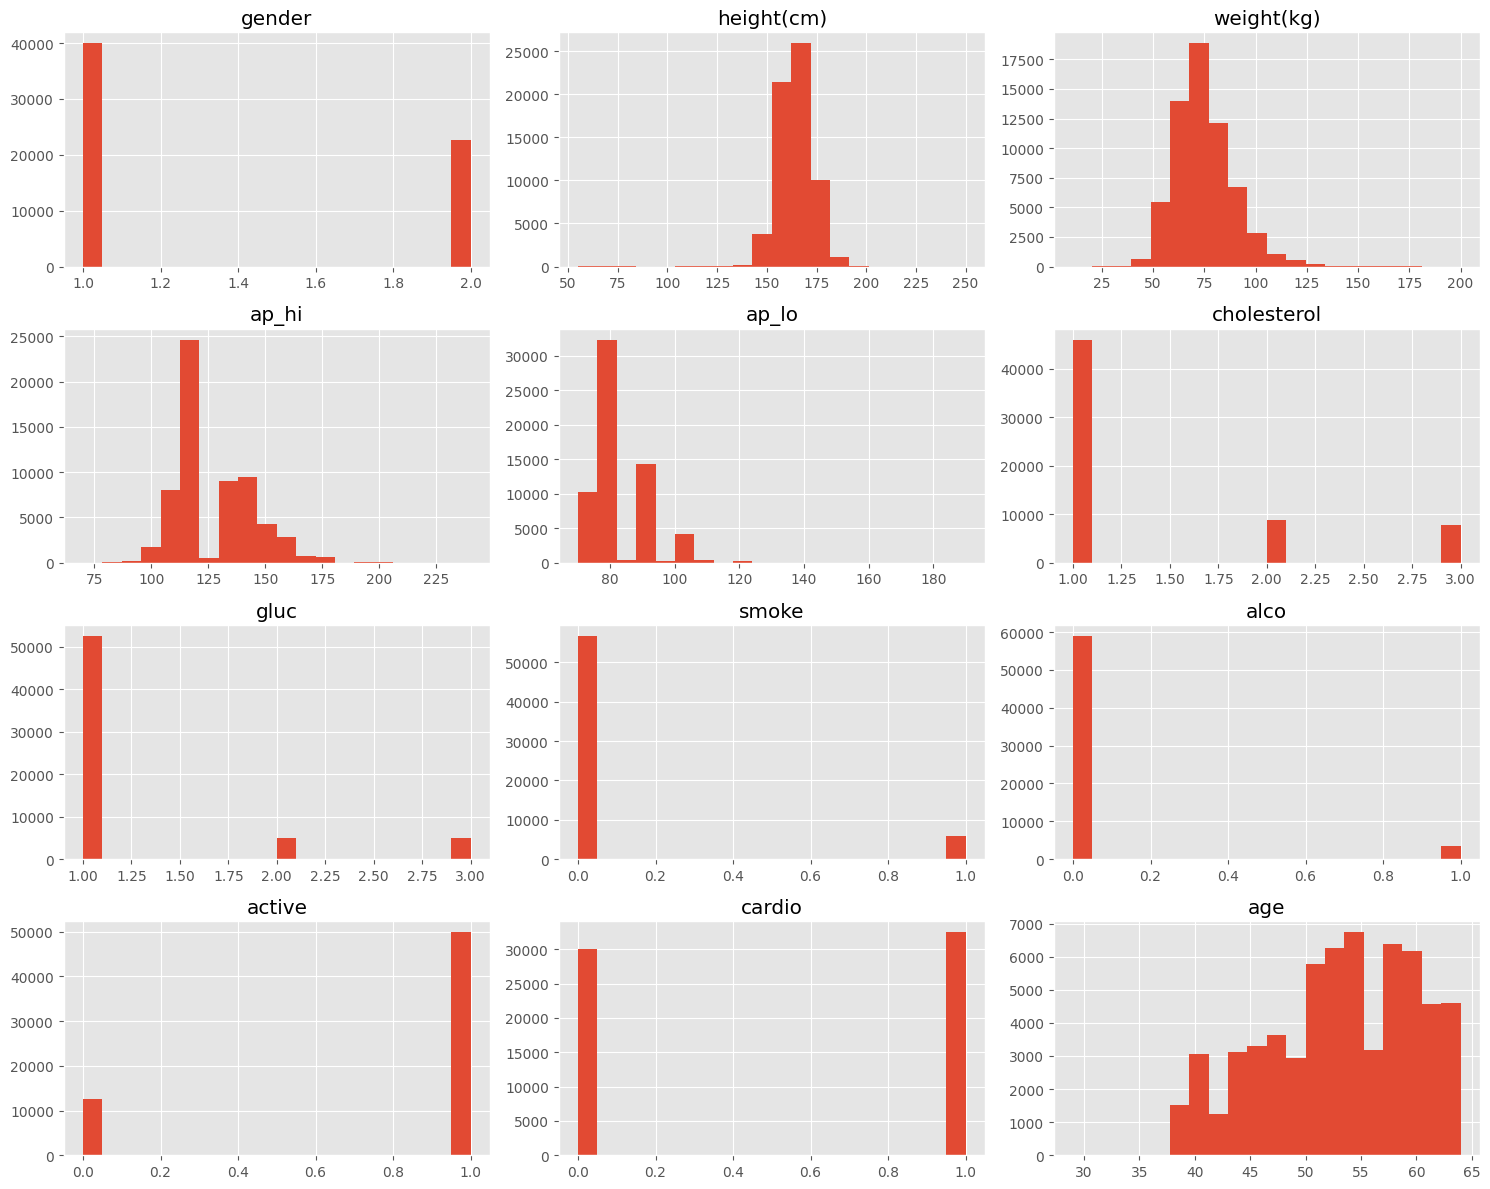

In [442]:

cleaned_data.hist(figsize=(15,12), bins=20);
plt.tight_layout()

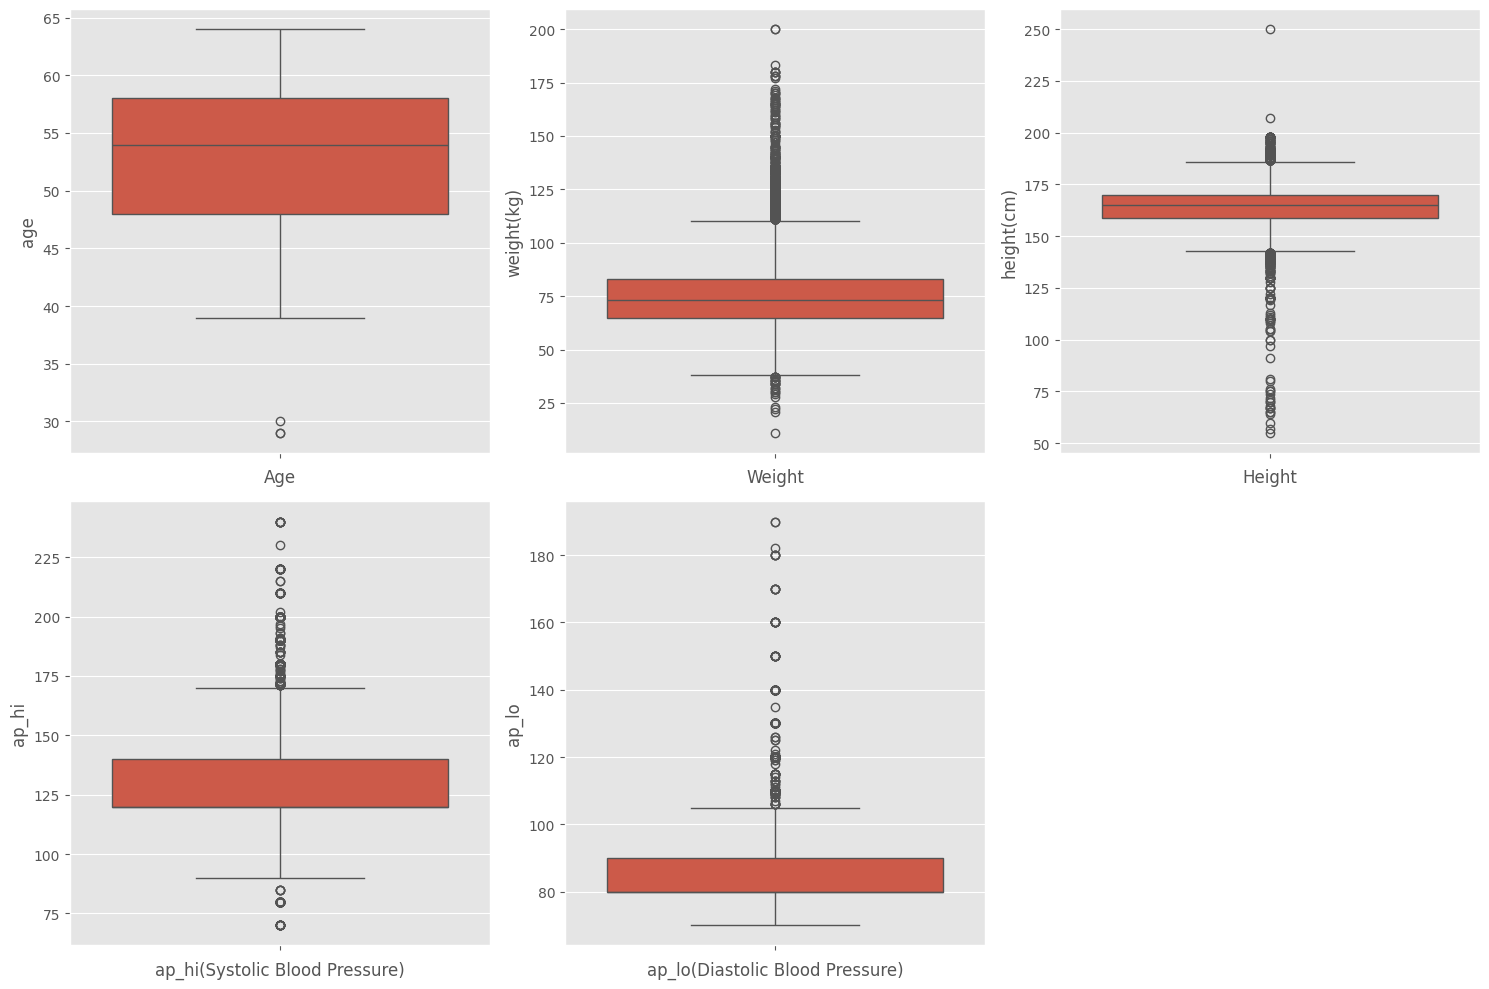

In [ ]:
# Visualize Distribution after Filtering out outliers
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(cleaned_data['age'])
plt.xlabel('Age')

plt.subplot(2, 3, 2)
sns.boxplot(cleaned_data['weight(kg)'])
plt.xlabel('Weight')

plt.subplot(2, 3, 3)
sns.boxplot(cleaned_data['height(cm)'])
plt.xlabel('Height')

plt.subplot(2, 3, 4)
sns.boxplot(cleaned_data['ap_hi'])
plt.xlabel('ap_hi(Systolic Blood Pressure)')

plt.subplot(2, 3, 5)
sns.boxplot(cleaned_data['ap_lo'])
plt.xlabel('ap_lo(Diastolic Blood Pressure)')

plt.tight_layout()

# **Feature Engineering**

### **Cholesterol**

**Desirable**: < 200 mg/dL (< 5.2 mmol/L)
Indicates a lower risk of heart disease.

**Borderline High**: 200–239 mg/dL (5.2–6.2 mmol/L)
Suggests moderate risk, often requiring lifestyle adjustments.

**High**: ≥ 240 mg/dL (≥ 6.2 mmol/L)
Associated with a higher risk of cardiovascular disease.

### **Fasting Blood Glucose Levels**

**Normal**: < 100 mg/dL (< 5.6 mmol/L)
Indicates healthy blood sugar regulation.

**Prediabetes**: 100–125 mg/dL (5.6–6.9 mmol/L)
Suggests elevated risk of developing diabetes, often warranting lifestyle changes.

**Diabetes**: ≥ 126 mg/dL (≥ 7.0 mmol/L)
Indicates diabetes, typically confirmed with repeat testing or additional metrics (e.g., A1C).

In [ ]:
# Assign a random cholesterol value for each row based on its cholesterol level (1, 2, or 3)
cleaned_data['chol'] = cleaned_data['cholesterol'].apply(
    lambda x: round(np.random.uniform(
        100, 200) if x == 1 else
        np.random.uniform(201, 240) if x == 2 else
        np.random.uniform(241, 300), 2)
)

cleaned_data['glucose'] = cleaned_data['gluc'].apply(
    lambda y: round(np.random.uniform(50, 100) if y == 1 else
                    np.random.uniform(100, 125) if y ==2 else
                    np.random.uniform(126, 150), 2)
)

cleaned_data['gender'] = cleaned_data['gender'].apply(lambda z: 0 if z == 1 else 1)

cleaned_data.head()

,gender,height(cm),weight(kg),ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age,chol,glucose
0,1,168.0,62.0,110,80,1,1,0,0,1,0,50,162.57,84.38
1,0,156.0,85.0,140,90,3,1,0,0,1,1,55,260.25,85.43
2,0,165.0,64.0,130,70,3,1,0,0,0,1,51,268.52,85.60
3,1,169.0,82.0,150,100,1,1,0,0,1,1,48,110.20,76.54
5,0,151.0,67.0,120,80,2,2,0,0,0,0,60,217.20,120.28


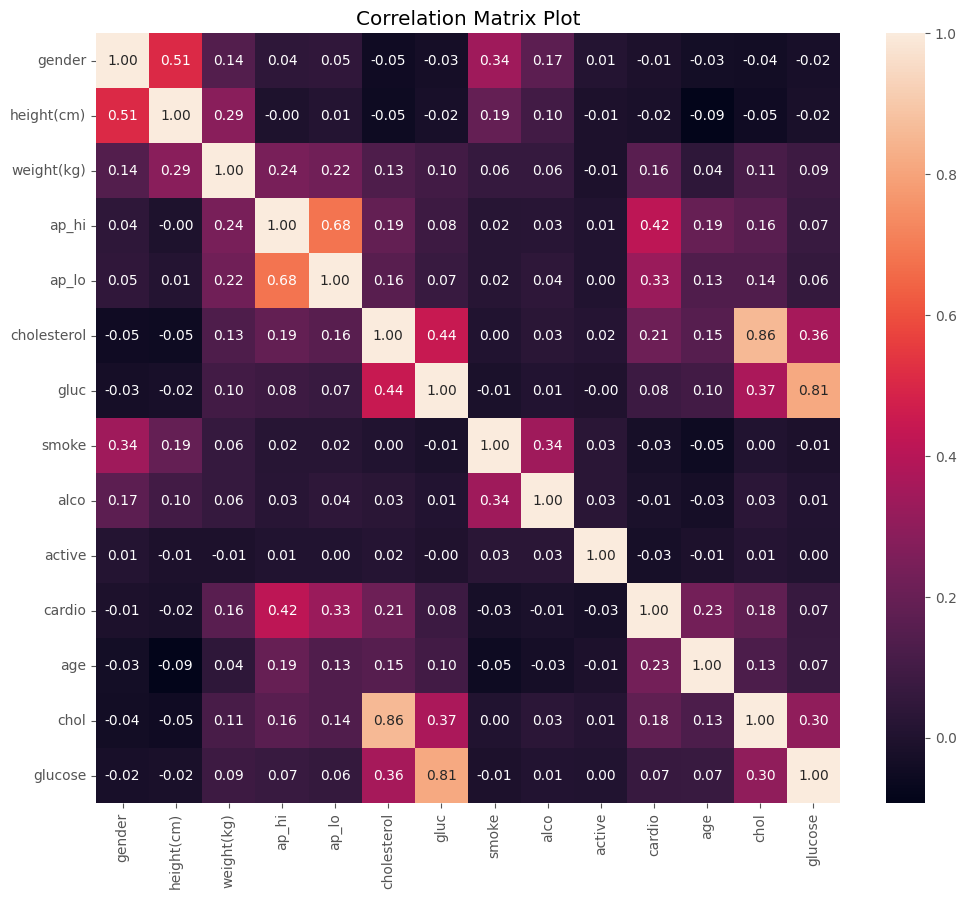

In [460]:
plt.figure(figsize=(12,10))
sns.heatmap(cleaned_data.corr(), fmt='.2f', annot=True)
plt.title('Correlation Matrix Plot')
plt.show()

# **Preprocessing**

In [461]:
# Select Columns
columns = ['age','gender', 'height(cm)', 'weight(kg)', 'ap_hi', 'ap_lo', 'smoke', 'alco', 'active', 'chol', 'glucose']

# Scale the data without the target variable
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data[columns])

# Convert to dataframe
scaled_data_df = pd.DataFrame(scaled_data, columns=scaler.get_feature_names_out(), index=cleaned_data.index)
print(scaled_data_df.shape)
scaled_data_df['cardio'] = cleaned_data.cardio
scaled_data_df.head()

(62501, 11)


,age,gender,height(cm),weight(kg),ap_hi,ap_lo,smoke,alco,active,chol,glucose,cardio
0,-0.437661,1.33030,0.428554,-0.884336,-1.095702,-0.283270,-0.31983,-0.24525,0.503193,-0.244879,0.056845,0
1,0.300546,-0.75171,-1.018760,0.702341,0.731839,0.845076,-0.31983,-0.24525,0.503193,1.695948,0.101732,1
2,-0.290020,-0.75171,0.066726,-0.746364,0.122659,-1.411615,-0.31983,-0.24525,-1.987309,1.860266,0.109000,1
3,-0.732944,1.33030,0.549164,0.495383,1.341020,1.973421,-0.31983,-0.24525,0.503193,-1.285431,-0.278314,1
5,1.038752,-0.75171,-1.621807,-0.539406,-0.486522,-0.283270,-0.31983,-0.24525,-1.987309,0.840577,1.591566,0


In [462]:
# Split the data into Features and target
X = scaled_data_df.drop('cardio', axis=1)
y = scaled_data_df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

# **Baseline Model**

In [463]:
# Build a simple model with all the features
base_model = LogisticRegression(random_state=42)
base_model.fit(X_train, y_train)
# Make Predictions
base_pred = base_model.predict(X_test)
score = classification_report(y_test, base_pred) #Evaluate

print(score)

              precision    recall  f1-score   support

           0       0.70      0.75      0.72      9030
           1       0.75      0.70      0.72      9721

    accuracy                           0.72     18751
   macro avg       0.72      0.72      0.72     18751
weighted avg       0.72      0.72      0.72     18751



# **Feature Selection**

In [464]:
selector = SelectKBest(score_func=f_classif)
selector.fit(X, y)

selscore = selector.scores_

n_features = range(0,11)
for i in n_features:
    print(f'{i + 1} feature: {selscore[i]:.2f}')

1 feature: 3426.87
2 feature: 3.56
3 feature: 22.95
4 feature: 1666.40
5 feature: 13152.65
6 feature: 7606.83
7 feature: 39.23
8 feature: 13.02
9 feature: 49.52
10 feature: 2089.27
11 feature: 277.75


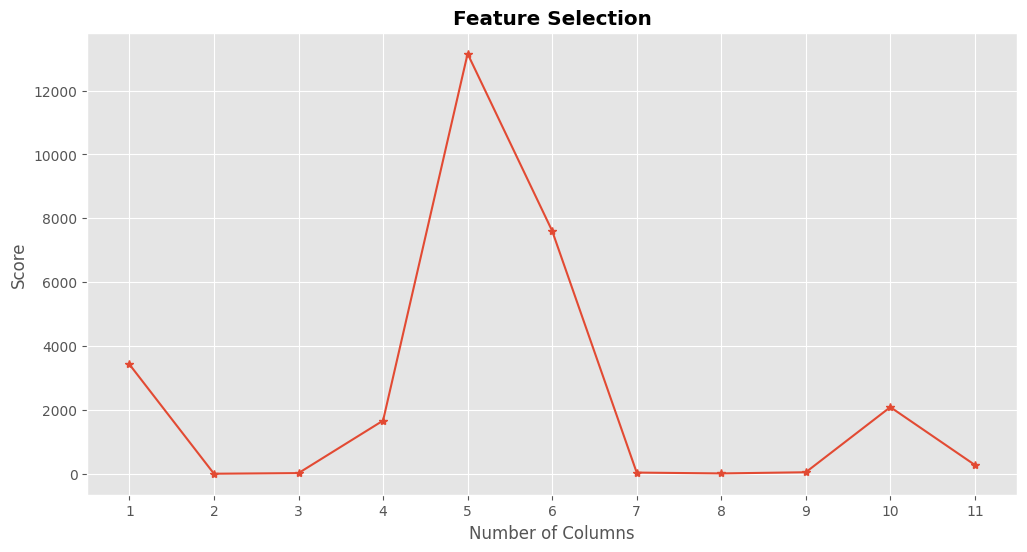

In [465]:
# Visualize the scores
plt.figure(figsize=(12,6))

plt.plot(list((x +1) for x in  range(0, 11)), selscore, marker= '*')
plt.xlabel('Number of Columns')
plt.ylabel('Score')
plt.title('Feature Selection', fontweight = 'bold')
plt.grid(True)
plt.xticks(list((x +1) for x in  range(0, 11)))

plt.show();

In [466]:
# feature selection with 5 features
selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(X, y)

# Get Column Names
selected_columns = X.columns[selector.get_support()]

# Transform X_train and X_test
X_train_sel = X_train[selected_columns]
X_test_sel = X_test[selected_columns]

print(selected_columns)

Index(['age', 'weight(kg)', 'ap_hi', 'ap_lo', 'chol'], dtype='object')


# **Model Building**

In [476]:
# Instantiate the class
model = RandomForestClassifier(n_estimators=1000, max_depth=3, random_state=42)
model.fit(X_train_sel, y_train)

# Make Predictions on the training and testing sets
ypred = model.predict(X_test_sel)
ypred

array([0, 1, 0, ..., 1, 1, 1], shape=(18751,))

# **Evaluation**

In [477]:
clf_scores = classification_report(y_test, ypred)
print(clf_scores)

              precision    recall  f1-score   support

           0       0.69      0.76      0.72      9030
           1       0.75      0.69      0.72      9721

    accuracy                           0.72     18751
   macro avg       0.72      0.72      0.72     18751
weighted avg       0.72      0.72      0.72     18751



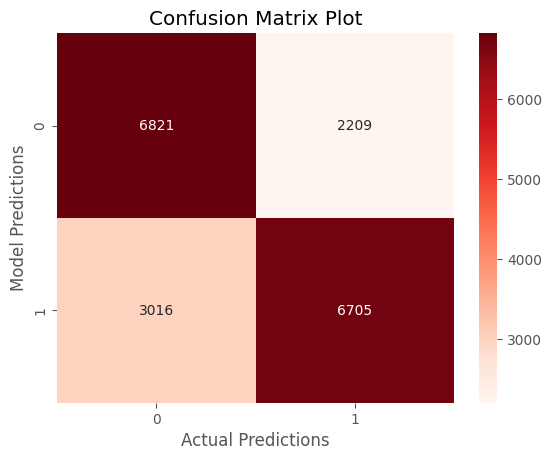

In [478]:
conf_matrix = confusion_matrix(y_test, ypred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Actual Predictions')
plt.ylabel('Model Predictions')
plt.title('Confusion Matrix Plot')
plt.show()

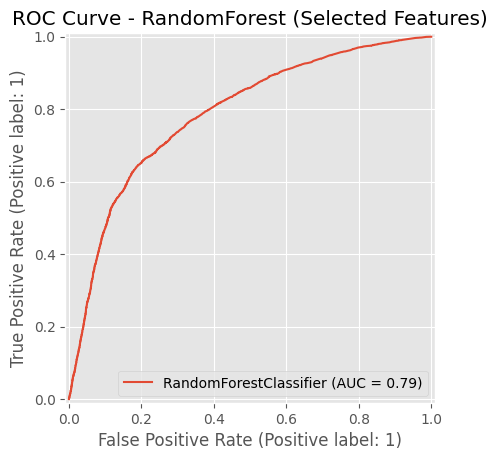

In [479]:
# Plot ROC curve for the RandomForest model
RocCurveDisplay.from_estimator(model, X_test_sel, y_test)
plt.title('ROC Curve - RandomForest (Selected Features)')
plt.show()

### Project Summary

This project aims to predict the presence of cardiovascular disease using patient data.

**Key Steps:**

1. **Data Loading & Cleaning:**  
   - Loaded the dataset and split combined columns.
   - Converted data types and transformed age from days to years.
   - Removed duplicates and filtered out unrealistic blood pressure values.

2. **Exploratory Data Analysis:**  
   - Used descriptive statistics and visualizations (histograms, boxplots) to understand distributions and detect outliers.

3. **Feature Engineering:**  
   - Created new features (`chol`, `glucose`) with realistic values based on categorical levels.
   - Encoded gender as binary.

4. **Preprocessing:**  
   - Selected relevant features and standardized them using `StandardScaler`.

5. **Data Splitting:**  
   - Split the data into training and testing sets.

6. **Baseline Model:**  
   - Built a logistic regression model to set a performance benchmark.

7. **Feature Selection:**  
   - Used `SelectKBest` to identify the most important features for prediction.

8. **Model Building:**  
   - Trained a Random Forest classifier using the selected features.

9. **Evaluation:**  
   - Evaluated model performance using classification metrics, confusion matrix, and ROC curve.

---

**Result:**  
The workflow ensures clean data, meaningful features, and robust model evaluation, providing reliable predictions for heart disease risk.